In [26]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

from openTSNE import TSNE

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.75 ms (started: 2023-06-03 15:16:33 -07:00)


In [2]:
all_components = [10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 3500, 4000]

time: 1.88 ms (started: 2023-06-03 09:20:14 -07:00)


In [3]:
newsgroups = fetch_20newsgroups(subset="all")

tfidf = TfidfVectorizer(sublinear_tf=True).fit_transform(newsgroups.data)
svd = TruncatedSVD(
    n_components=np.max(all_components), random_state=42, algorithm="arpack"
).fit_transform(tfidf)

time: 1h 31min 9s (started: 2023-06-03 09:20:18 -07:00)


In [27]:
def knn_accuracy(X, y=newsgroups.target, k=10, balanced=False):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42
    )

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    if balanced:
        y_pred = neigh.predict(X_test)
        return balanced_accuracy_score(y_test, y_pred)
    return neigh.score(X_test, y_test)

time: 3.55 ms (started: 2023-06-03 15:17:34 -07:00)


In [5]:
Zs = []

for nc in all_components:
    print(".", end="")

    Z1 = TSNE().fit(svd[:, :nc])
    Z2 = TSNE().fit(normalize(svd[:, :nc], axis=1))

    Zs.append((Z1, Z2))

............time: 1h 17min 11s (started: 2023-06-03 10:51:28 -07:00)


In [6]:
print(f"TF-IDF: {knn_accuracy(tfidf):.2f}\n")

print("SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))")

for i, nc in enumerate(all_components):
    norms = np.sqrt(np.sum(svd[:, :nc] ** 2, axis=1, keepdims=True))

    print(
        f"    {nc:4}     {knn_accuracy(svd[:,:nc]):.2f}"
        f"        {knn_accuracy(normalize(svd[:,:nc], axis=1)):.2f}"
        f"          {knn_accuracy(Zs[i][0]):.2f}"
        f"              {knn_accuracy(Zs[i][1]):.2f}"
    )

TF-IDF: 0.83

SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))
      10     0.55        0.57          0.52              0.52
      50     0.74        0.75          0.68              0.70
     100     0.76        0.78          0.70              0.73
     200     0.77        0.78          0.70              0.73
     300     0.77        0.78          0.70              0.74
     400     0.75        0.79          0.72              0.75
     500     0.75        0.79          0.71              0.75
    1000     0.72        0.80          0.72              0.76
    2000     0.70        0.82          0.67              0.76
    3000     0.70        0.82          0.65              0.76
    3500     0.70        0.82          0.68              0.76
    4000     0.72        0.83          0.68              0.76
time: 1min 47s (started: 2023-06-03 12:08:39 -07:00)


In [14]:
np.where(np.array(all_components) == 500)[0][0]

6

In [17]:
# SVD to 500 components, L2 normalization, then t-SNE

plt.figure(figsize=(4,4), layout='constrained')

plt.scatter(*Zs[np.where(np.array(all_components) == 500)[0][0]][1].T, c=newsgroups.target, s=1, cmap='tab10')

<IPython.core.display.Javascript object>

In [18]:
import seaborn as sns

In [20]:
sns.scatterplot(*Zs[np.where(np.array(all_components) == 500)[0][0]][1].T, c=newsgroups.target, s=1, cmap='tab10')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [9]:
from drnb.io import read_pickle

iclr_text = read_pickle(
    "iclr",
    suffix="text",
)

time: 819 ms (started: 2023-06-03 12:50:40 -07:00)


In [10]:
iclr_tfidf = TfidfVectorizer(norm="l2", sublinear_tf=True).fit_transform(iclr_text)

time: 1.89 s (started: 2023-06-03 12:50:43 -07:00)


In [11]:
iclr_svd = TruncatedSVD(
    n_components=np.max(all_components), random_state=42, algorithm="arpack"
).fit_transform(iclr_tfidf)

time: 1h 1min 38s (started: 2023-06-03 12:50:45 -07:00)


In [12]:
iclr_Zs = []

for nc in all_components:
    print(".", end="")

    iclr_Z1 = TSNE().fit(iclr_svd[:, :nc])
    iclr_Z2 = TSNE().fit(normalize(iclr_svd[:, :nc], axis=1))

    iclr_Zs.append((iclr_Z1, iclr_Z2))

.

[13:52:34] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=853641;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=700941;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=928050;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=838150;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:52:41] INFO     Automatically determined negative gradient method `fft`                              ]8;id=735334;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=710911;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:53:39] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=838265;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=541793;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=149180;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=525327;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:53:46] INFO     Automatically determined negative gradient method `fft`                              ]8;id=207371;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=803399;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[13:54:45] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=878174;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=805691;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=191095;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=345441;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:54:52] INFO     Automatically determined negative gradient method `fft`                              ]8;id=996138;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=247180;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:55:46] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=401425;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=244409;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=832894;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=6576;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:55:53] INFO     Automatically determined negative gradient method `fft`                              ]8;id=117866;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=617858;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[13:56:51] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=305009;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=475175;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=395644;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=355116;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:56:58] INFO     Automatically determined negative gradient method `fft`                              ]8;id=936207;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=387914;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:57:51] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=734480;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=629159;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=336292;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=705193;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:57:57] INFO     Automatically determined negative gradient method `fft`                              ]8;id=886609;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=281266;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[13:58:57] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=953447;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=392159;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=127924;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=716229;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[13:59:05] INFO     Automatically determined negative gradient method `fft`                              ]8;id=661711;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=970139;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:00:01] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=66243;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=716230;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:00:02] INFO     Automatically determined negative gradient method `fft`                              ]8;id=933015;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=785559;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:00:09] INFO     Automatically determined negative gradient method `fft`                              ]8;id=387382;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=680979;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:01:16] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=671611;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=161899;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=504121;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=588284;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:01:24] INFO     Automatically determined negative gradient method `fft`                              ]8;id=422768;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=619110;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:02:23] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=370633;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=970073;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=98140;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=149183;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:02:30] INFO     Automatically determined negative gradient method `fft`                              ]8;id=109289;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=933638;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:03:41] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=809785;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=601625;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=749292;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=992585;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:03:49] INFO     Automatically determined negative gradient method `fft`                              ]8;id=107467;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=595427;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:04:50] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=600264;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=251285;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:04:51] INFO     Automatically determined negative gradient method `fft`                              ]8;id=913227;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=417285;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:04:58] INFO     Automatically determined negative gradient method `fft`                              ]8;id=81537;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=509733;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:06:17] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=990224;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=353427;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=139445;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=321335;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:06:25] INFO     Automatically determined negative gradient method `fft`                              ]8;id=877438;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=680657;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:07:35] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=647918;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=212072;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=162419;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=254121;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:07:42] INFO     Automatically determined negative gradient method `fft`                              ]8;id=895829;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=443054;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:09:37] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=166205;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=14686;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:09:38] INFO     Automatically determined negative gradient method `fft`                              ]8;id=432572;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=98483;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:09:45] INFO     Automatically determined negative gradient method `fft`                              ]8;id=851506;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=663409;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:11:25] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=592808;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=171877;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:11:26] INFO     Automatically determined negative gradient method `fft`                              ]8;id=381054;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=417626;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:11:33] INFO     Automatically determined negative gradient method `fft`                              ]8;id=933133;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=485104;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:14:49] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=640774;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=969302;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:14:51] INFO     Automatically determined negative gradient method `fft`                              ]8;id=457767;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=118398;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:14:58] INFO     Automatically determined negative gradient method `fft`                              ]8;id=266814;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=404293;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:18:08] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=683369;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=403915;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:18:09] INFO     Automatically determined negative gradient method `fft`                              ]8;id=711772;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=784654;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:18:16] INFO     Automatically determined negative gradient method `fft`                              ]8;id=922897;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=520342;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:23:21] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=840746;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=998477;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:23:24] INFO     Automatically determined negative gradient method `fft`                              ]8;id=472608;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=593548;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:23:32] INFO     Automatically determined negative gradient method `fft`                              ]8;id=152905;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=122388;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:28:28] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=793915;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=157040;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:28:31] INFO     Automatically determined negative gradient method `fft`                              ]8;id=485097;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=714452;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:28:38] INFO     Automatically determined negative gradient method `fft`                              ]8;id=723297;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=342535;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:34:38] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=477718;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=795378;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:34:41] INFO     Automatically determined negative gradient method `fft`                              ]8;id=406051;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=41291;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:34:49] INFO     Automatically determined negative gradient method `fft`                              ]8;id=582280;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=889612;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:40:46] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=685213;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=788836;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:40:49] INFO     Automatically determined negative gradient method `fft`                              ]8;id=345924;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=338569;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:40:56] INFO     Automatically determined negative gradient method `fft`                              ]8;id=81398;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=373119;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

.

[14:48:21] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=687625;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=718902;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:48:25] INFO     Automatically determined negative gradient method `fft`                              ]8;id=44143;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=761556;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:48:33] INFO     Automatically determined negative gradient method `fft`                              ]8;id=833426;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=471754;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:55:46] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=274724;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=346317;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[14:55:50] INFO     Automatically determined negative gradient method `fft`                              ]8;id=607964;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=505566;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[14:55:58] INFO     Automatically determined negative gradient method `fft`                              ]8;id=338820;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=37039;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

time: 1h 4min 20s (started: 2023-06-03 13:52:24 -07:00)


In [16]:
from drnb.io.dataset import read_target

time: 917 µs (started: 2023-06-03 15:06:29 -07:00)


In [17]:
iclr_target = read_target("iclr")

time: 84.3 ms (started: 2023-06-03 15:06:43 -07:00)


In [18]:
iclr_target.shape

(16554, 3)

time: 3.71 ms (started: 2023-06-03 15:06:49 -07:00)


In [24]:
iclr_target["class"].values

array([ 0,  2, 31, ...,  1, 16,  0])

time: 4.7 ms (started: 2023-06-03 15:07:25 -07:00)


In [28]:
print(f'TF-IDF: {knn_accuracy(iclr_tfidf, y=iclr_target["class"].values):.2f}\n')

print("SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))")

for i, nc in enumerate(all_components):
    norms = np.sqrt(np.sum(svd[:, :nc] ** 2, axis=1, keepdims=True))

    print(
        f'    {nc:4}     {knn_accuracy(iclr_svd[:,:nc], y=iclr_target["class"].values):.2f}'
        f'        {knn_accuracy(normalize(iclr_svd[:,:nc], axis=1), y=iclr_target["class"].values):.2f}'
        f'          {knn_accuracy(iclr_Zs[i][0], y=iclr_target["class"].values):.2f}'
        f'              {knn_accuracy(iclr_Zs[i][1], y=iclr_target["class"].values):.2f}'
    )

TF-IDF: 0.63

SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))
      10     0.55        0.55          0.53              0.56
      50     0.63        0.62          0.60              0.60
     100     0.64        0.65          0.63              0.61
     200     0.64        0.64          0.62              0.61
     300     0.63        0.64          0.62              0.62
     400     0.62        0.64          0.62              0.62
     500     0.61        0.63          0.62              0.61
    1000     0.58        0.64          0.61              0.61
    2000     0.57        0.63          0.61              0.61
    3000     0.61        0.63          0.61              0.61
    3500     0.62        0.64          0.60              0.61
    4000     0.63        0.64          0.59              0.62
time: 56.3 s (started: 2023-06-03 15:17:41 -07:00)


In [29]:
print(
    f'TF-IDF: {knn_accuracy(iclr_tfidf, y=iclr_target["class"].values, balanced=True):.2f}\n'
)

print("SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))")

for i, nc in enumerate(all_components):
    norms = np.sqrt(np.sum(svd[:, :nc] ** 2, axis=1, keepdims=True))

    print(
        f'    {nc:4}     {knn_accuracy(iclr_svd[:,:nc], y=iclr_target["class"].values, balanced=True):.2f}'
        f'        {knn_accuracy(normalize(iclr_svd[:,:nc], axis=1), y=iclr_target["class"].values, balanced=True):.2f}'
        f'          {knn_accuracy(iclr_Zs[i][0], y=iclr_target["class"].values, balanced=True):.2f}'
        f'              {knn_accuracy(iclr_Zs[i][1], y=iclr_target["class"].values, balanced=True):.2f}'
    )

TF-IDF: 0.54

SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))
      10     0.22        0.23          0.23              0.26
      50     0.44        0.49          0.47              0.46
     100     0.49        0.56          0.53              0.51
     200     0.47        0.58          0.52              0.53
     300     0.45        0.60          0.52              0.55
     400     0.43        0.60          0.52              0.54
     500     0.38        0.58          0.50              0.52
    1000     0.28        0.57          0.48              0.50
    2000     0.29        0.56          0.46              0.48
    3000     0.38        0.55          0.46              0.48
    3500     0.45        0.54          0.45              0.48
    4000     0.50        0.54          0.45              0.48
time: 55.8 s (started: 2023-06-03 15:18:54 -07:00)


In [45]:
import seaborn as sns


def seascatter_ng20(n_components=500, normalized=False, alpha=1.0):
    # first extract your data
    indices = np.where(np.array(all_components) == n_components)[0][0]
    if normalized:
        zidx = 1
    else:
        zidx = 0
    x, y = Zs[indices][zidx].T

    data = pd.DataFrame({"X": x, "Y": y, "Color": newsgroups.target})

    sns.scatterplot(
        x="X",
        y="Y",
        hue="Color",
        palette="tab10",
        size=1,
        data=data,
        legend=False,
        alpha=alpha,
    )

time: 10.5 ms (started: 2023-06-03 16:06:08 -07:00)


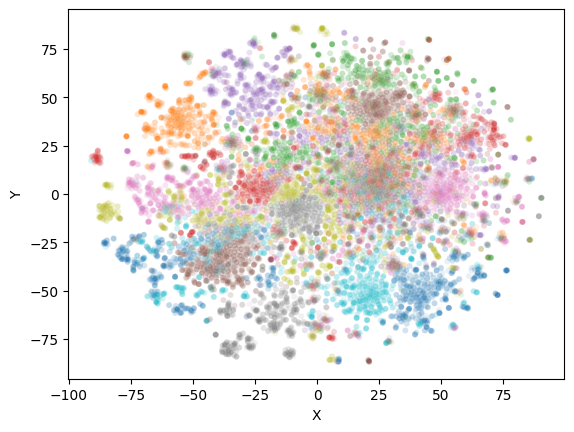

time: 665 ms (started: 2023-06-03 16:14:36 -07:00)


In [56]:
seascatter_ng20(400, False, alpha=0.1)

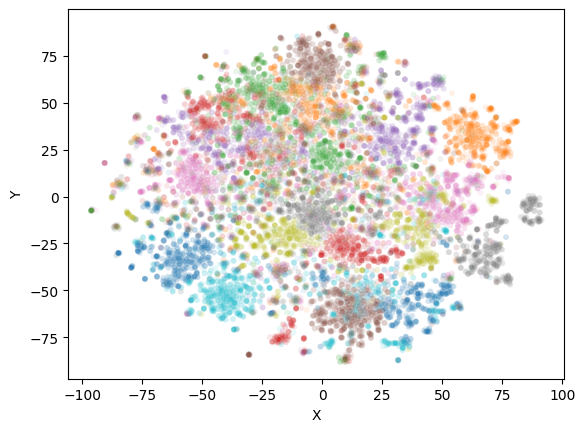

time: 698 ms (started: 2023-06-03 16:15:38 -07:00)


In [58]:
seascatter_ng20(400, True, alpha=0.1)

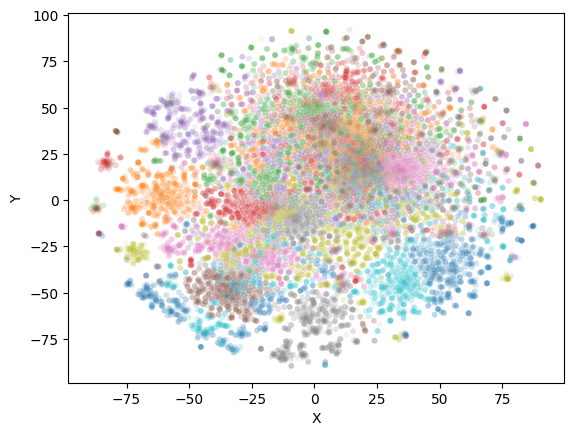

time: 718 ms (started: 2023-06-03 16:15:51 -07:00)


In [59]:
seascatter_ng20(1000, False, alpha=0.1)

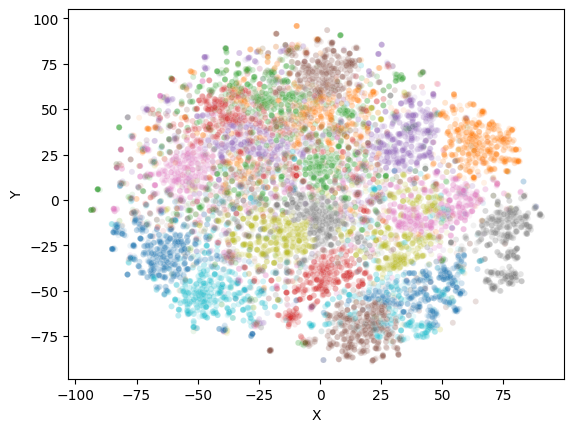

time: 693 ms (started: 2023-06-03 16:14:48 -07:00)


In [57]:
seascatter_ng20(1000, True, alpha=0.1)

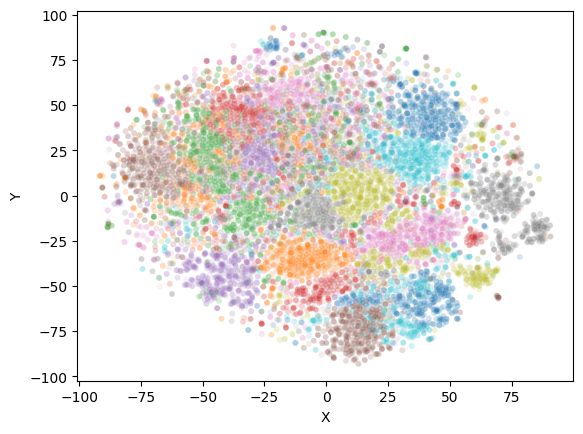

time: 711 ms (started: 2023-06-03 16:10:51 -07:00)


In [54]:
seascatter_ng20(4000, True, alpha=0.1)

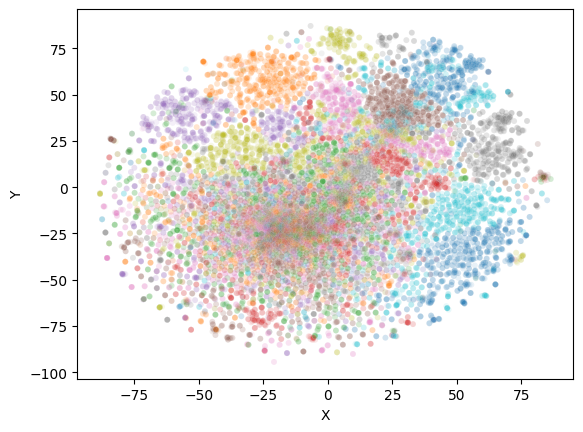

time: 695 ms (started: 2023-06-03 16:10:55 -07:00)


In [55]:
seascatter_ng20(4000, False, alpha=0.1)

In [50]:
def seascatter_iclr(n_components=500, normalized=False, alpha=1.0):
    # first extract your data
    indices = np.where(np.array(all_components) == n_components)[0][0]
    if normalized:
        zidx = 1
    else:
        zidx = 0
    x, y = iclr_Zs[indices][zidx].T

    data = pd.DataFrame({"X": x, "Y": y, "Color": iclr_target["class"].values})

    sns.scatterplot(
        x="X",
        y="Y",
        hue="Color",
        palette="tab10",
        size=1,
        data=data,
        legend=False,
        alpha=alpha,
    )

time: 10.3 ms (started: 2023-06-03 16:06:50 -07:00)


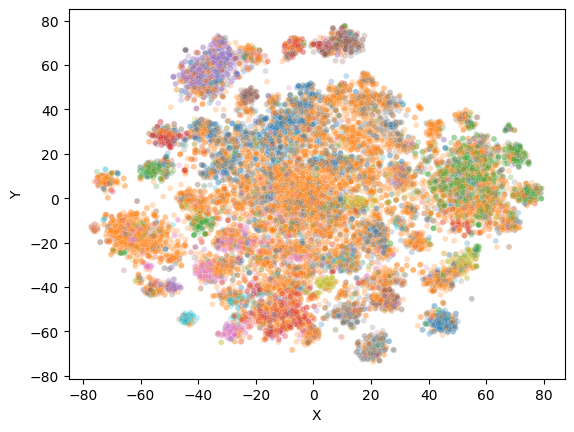

time: 659 ms (started: 2023-06-03 16:06:58 -07:00)


In [52]:
seascatter_iclr(100, False, alpha=0.25)

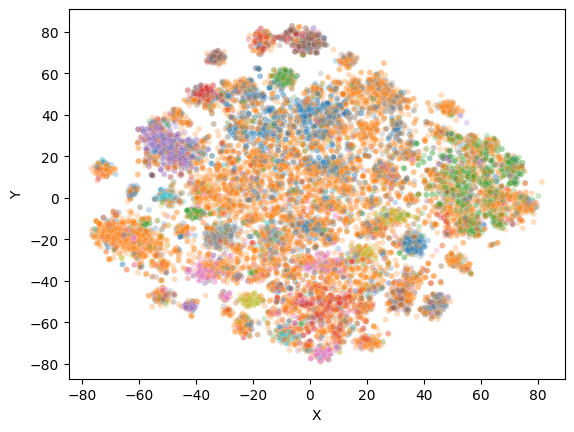

time: 620 ms (started: 2023-06-03 16:07:04 -07:00)


In [53]:
seascatter_iclr(300, True, alpha=0.25)

In [66]:
print(f'Full: {knn_accuracy(mnist, y=mnist_target["class"].values):.2f}\n')

print("SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))")

for i, nc in enumerate(all_components[:7]):
    norms = np.sqrt(np.sum(svd[:, :nc] ** 2, axis=1, keepdims=True))

    print(
        f'    {nc:4}     {knn_accuracy(mnist_svd[:,:nc], y=mnist_target["class"].values):.2f}'
        f'        {knn_accuracy(normalize(mnist_svd[:,:nc], axis=1), y=mnist_target["class"].values):.2f}'
        f'          {knn_accuracy(mnist_Zs[i][0], y=mnist_target["class"].values):.2f}'
        f'              {knn_accuracy(mnist_Zs[i][1], y=mnist_target["class"].values):.2f}'
    )

Full: 0.97

SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))
      10     0.93        0.93          0.91              0.92
      50     0.97        0.97          0.98              0.98
     100     0.97        0.97          0.97              0.97
     200     0.97        0.97          0.97              0.97
     300     0.97        0.97          0.97              0.97
     400     0.97        0.97          0.97              0.97
     500     0.97        0.97          0.97              0.97
time: 51.3 s (started: 2023-06-03 17:15:49 -07:00)


In [67]:
from drnb.io.dataset import read_dataset

mnist, mnist_target = read_dataset("kuzushiji")

time: 1.28 s (started: 2023-06-03 17:23:46 -07:00)


In [70]:
mnist_target = mnist_target.values

time: 866 µs (started: 2023-06-03 17:24:29 -07:00)


In [71]:
mnist_svd = TruncatedSVD(
    n_components=np.max(all_components[:7]), random_state=42, algorithm="arpack"
).fit_transform(mnist)

time: 29.9 s (started: 2023-06-03 17:24:46 -07:00)


In [72]:
mnist_Zs = []

for nc in all_components[:7]:
    mnist_Z1 = TSNE().fit(mnist_svd[:, :nc])
    mnist_Z2 = TSNE().fit(normalize(mnist_svd[:, :nc], axis=1))

    mnist_Zs.append((mnist_Z1, mnist_Z2))

[17:26:04] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=682246;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=680887;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=366210;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=807858;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:26:26] INFO     Automatically determined negative gradient method `fft`                              ]8;id=701437;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=180883;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:28:51] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=838903;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=849900;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=223718;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=45718;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:29:13] INFO     Automatically determined negative gradient method `fft`                              ]8;id=675666;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=176442;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:31:36] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=38988;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=979535;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=112541;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=984631;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:32:01] INFO     Automatically determined negative gradient method `fft`                              ]8;id=812707;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=50181;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:34:33] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=228069;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=40747;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=780352;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=951534;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:34:58] INFO     Automatically determined negative gradient method `fft`                              ]8;id=576748;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=724682;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:37:32] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=25506;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=334873;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=842965;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=637664;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:37:56] INFO     Automatically determined negative gradient method `fft`                              ]8;id=225562;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=876686;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:40:25] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=268637;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=199994;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[17:40:26] INFO     Automatically determined negative gradient method `fft`                              ]8;id=955655;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=709221;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:40:49] INFO     Automatically determined negative gradient method `fft`                              ]8;id=275517;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=189911;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:43:44] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=509506;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=256050;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=150558;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=266875;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:44:09] INFO     Automatically determined negative gradient method `fft`                              ]8;id=746151;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=279799;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:47:00] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=84374;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=194774;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[17:47:01] INFO     Automatically determined negative gradient method `fft`                              ]8;id=523117;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=986602;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:47:25] INFO     Automatically determined negative gradient method `fft`                              ]8;id=827733;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=493929;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:50:42] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=898077;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=729989;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[17:50:43] INFO     Automatically determined negative gradient method `fft`                              ]8;id=816680;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=17888;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:51:10] INFO     Automatically determined negative gradient method `fft`                              ]8;id=724729;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=745707;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:54:29] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=500114;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=160236;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[17:54:30] INFO     Automatically determined negative gradient method `fft`                              ]8;id=535819;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=999013;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:54:54] INFO     Automatically determined negative gradient method `fft`                              ]8;id=633607;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=318657;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:58:33] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=397207;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=881558;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[17:58:34] INFO     Automatically determined negative gradient method `fft`                              ]8;id=379348;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=891093;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[17:58:59] INFO     Automatically determined negative gradient method `fft`                              ]8;id=240969;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=121317;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:02:42] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=422363;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=550906;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=916759;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=898457;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:03:07] INFO     Automatically determined negative gradient method `fft`                              ]8;id=694347;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=242684;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:07:18] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=357480;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=244434;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[18:07:19] INFO     Automatically determined negative gradient method `fft`                              ]8;id=262146;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=573660;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:07:45] INFO     Automatically determined negative gradient method `fft`                              ]8;id=595768;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=28624;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:11:58] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=762299;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=199449;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[18:11:59] INFO     Automatically determined negative gradient method `fft`                              ]8;id=52111;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=985599;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:12:23] INFO     Automatically determined negative gradient method `fft`                              ]8;id=776602;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=315251;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

time: 48min 46s (started: 2023-06-03 17:25:16 -07:00)


In [74]:
print(f"Full: {knn_accuracy(mnist, y=mnist_target):.2f}\n")

print("SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))")

for i, nc in enumerate(all_components[:7]):
    print(
        f"    {nc:4}     {knn_accuracy(mnist_svd[:,:nc], y=mnist_target):.2f}"
        f"        {knn_accuracy(normalize(mnist_svd[:,:nc], axis=1), y=mnist_target):.2f}"
        f"          {knn_accuracy(mnist_Zs[i][0], y=mnist_target):.2f}"
        f"              {knn_accuracy(mnist_Zs[i][1], y=mnist_target):.2f}"
    )

Full: 0.96

SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))
      10     0.88        0.88          0.86              0.86
      50     0.97        0.98          0.97              0.98
     100     0.97        0.98          0.97              0.98
     200     0.97        0.98          0.97              0.98
     300     0.96        0.98          0.97              0.98
     400     0.96        0.97          0.97              0.97
     500     0.96        0.97          0.97              0.98
time: 52.1 s (started: 2023-06-03 18:16:14 -07:00)


In [84]:
def seascatter_mnist(n_components=500, normalized=False, alpha=1.0):
    # first extract your data
    indices = np.where(np.array(all_components) == n_components)[0][0]
    if normalized:
        zidx = 1
    else:
        zidx = 0
    x, y = mnist_Zs[indices][zidx].T

    data = pd.DataFrame({"X": x, "Y": y, "Color": mnist_target})

    sns.scatterplot(
        x="X",
        y="Y",
        hue="Color",
        palette="tab10",
        size=1,
        data=data,
        legend=False,
        alpha=alpha,
    )

time: 6.64 ms (started: 2023-06-03 18:19:44 -07:00)


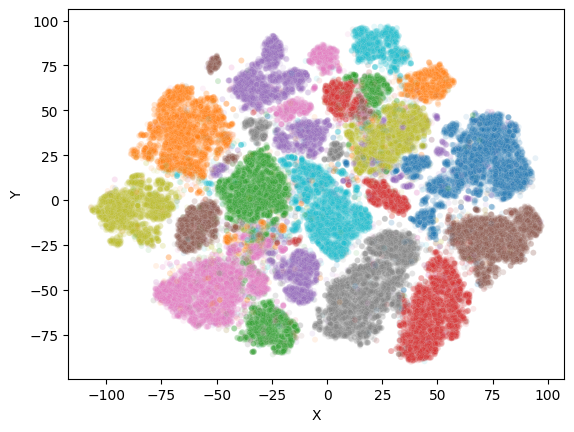

time: 2.01 s (started: 2023-06-03 18:20:15 -07:00)


In [87]:
seascatter_mnist(n_components=300, normalized=False, alpha=0.1)

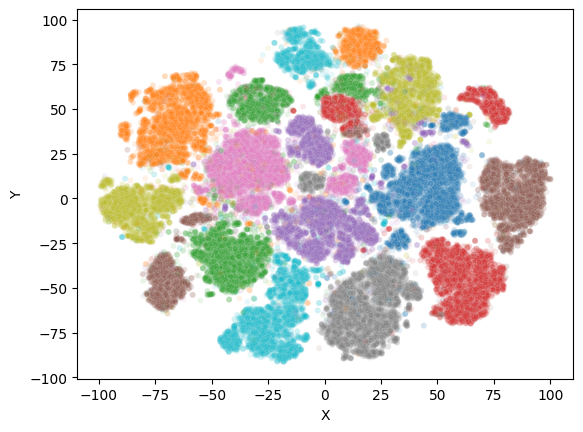

time: 1.97 s (started: 2023-06-03 18:20:21 -07:00)


In [88]:
seascatter_mnist(n_components=300, normalized=True, alpha=0.1)

In [89]:
mnist_svd = TruncatedSVD(
    n_components=np.max(all_components[:7]), random_state=42, algorithm="arpack"
).fit_transform(normalize(mnist))

time: 25.8 s (started: 2023-06-03 18:30:55 -07:00)


In [90]:
mnist_Zs = []

for nc in all_components[:7]:
    mnist_Z1 = TSNE().fit(mnist_svd[:, :nc])
    mnist_Z2 = TSNE().fit(normalize(mnist_svd[:, :nc], axis=1))

    mnist_Zs.append((mnist_Z1, mnist_Z2))

[18:32:06] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=351473;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=350782;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=957841;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=122837;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:32:29] INFO     Automatically determined negative gradient method `fft`                              ]8;id=854994;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=243898;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:34:50] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=383806;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=667985;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=24580;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=992185;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:35:13] INFO     Automatically determined negative gradient method `fft`                              ]8;id=306029;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=755533;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:37:35] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=785406;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=27707;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=505408;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=287313;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:37:58] INFO     Automatically determined negative gradient method `fft`                              ]8;id=819019;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=196995;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:40:23] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=730716;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=383927;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[18:40:24] INFO     Automatically determined negative gradient method `fft`                              ]8;id=746652;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=411161;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:40:47] INFO     Automatically determined negative gradient method `fft`                              ]8;id=57929;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=199021;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:43:20] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=171814;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=361429;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=845644;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=282742;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:43:43] INFO     Automatically determined negative gradient method `fft`                              ]8;id=784509;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=71843;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:46:16] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=565585;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=823968;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

           INFO     Automatically determined negative gradient method `fft`                              ]8;id=733104;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=158094;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:46:39] INFO     Automatically determined negative gradient method `fft`                              ]8;id=430680;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=35183;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:49:32] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=386974;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=955437;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[18:49:33] INFO     Automatically determined negative gradient method `fft`                              ]8;id=653715;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=7905;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:49:58] INFO     Automatically determined negative gradient method `fft`                              ]8;id=281958;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=4067;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:52:54] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=127397;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=802529;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[18:52:55] INFO     Automatically determined negative gradient method `fft`                              ]8;id=723073;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=266446;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:53:20] INFO     Automatically determined negative gradient method `fft`                              ]8;id=34181;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=423636;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:56:42] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=257132;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=874648;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[18:56:43] INFO     Automatically determined negative gradient method `fft`                              ]8;id=725791;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=341689;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[18:57:08] INFO     Automatically determined negative gradient method `fft`                              ]8;id=891416;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=770494;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:00:35] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=17553;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=164265;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[19:00:40] INFO     Automatically determined negative gradient method `fft`                              ]8;id=388232;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=182325;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:01:06] INFO     Automatically determined negative gradient method `fft`                              ]8;id=385173;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=665959;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:04:58] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=891372;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=736260;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[19:04:59] INFO     Automatically determined negative gradient method `fft`                              ]8;id=685327;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=952183;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:05:24] INFO     Automatically determined negative gradient method `fft`                              ]8;id=42850;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=590299;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:09:08] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=157028;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=775553;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[19:09:09] INFO     Automatically determined negative gradient method `fft`                              ]8;id=45645;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=740720;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:09:34] INFO     Automatically determined negative gradient method `fft`                              ]8;id=792011;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=74148;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:13:47] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=305921;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=18132;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[19:13:48] INFO     Automatically determined negative gradient method `fft`                              ]8;id=67019;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=408009;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:14:13] INFO     Automatically determined negative gradient method `fft`                              ]8;id=367439;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=614535;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:18:27] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=667788;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=631498;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1347\1347]8;;\

[19:18:28] INFO     Automatically determined negative gradient method `fft`                              ]8;id=101621;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=433144;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

[19:18:53] INFO     Automatically determined negative gradient method `fft`                              ]8;id=25234;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=840341;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#52\52]8;;\

time: 49min 21s (started: 2023-06-03 18:31:21 -07:00)


In [91]:
print(f"Full: {knn_accuracy(mnist, y=mnist_target):.2f}\n")

print("SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))")

for i, nc in enumerate(all_components[:7]):
    print(
        f"    {nc:4}     {knn_accuracy(mnist_svd[:,:nc], y=mnist_target):.2f}"
        f"        {knn_accuracy(normalize(mnist_svd[:,:nc], axis=1), y=mnist_target):.2f}"
        f"          {knn_accuracy(mnist_Zs[i][0], y=mnist_target):.2f}"
        f"              {knn_accuracy(mnist_Zs[i][1], y=mnist_target):.2f}"
    )

Full: 0.96

SVD dim      SVD     L2(SVD)    t-SNE(SVD)    t-SNE(L2(SVD))
      10     0.89        0.87          0.87              0.86
      50     0.98        0.98          0.98              0.98
     100     0.98        0.98          0.98              0.98
     200     0.98        0.97          0.98              0.98
     300     0.98        0.98          0.98              0.98
     400     0.97        0.97          0.98              0.98
     500     0.98        0.97          0.98              0.98
time: 57.7 s (started: 2023-06-03 19:20:42 -07:00)


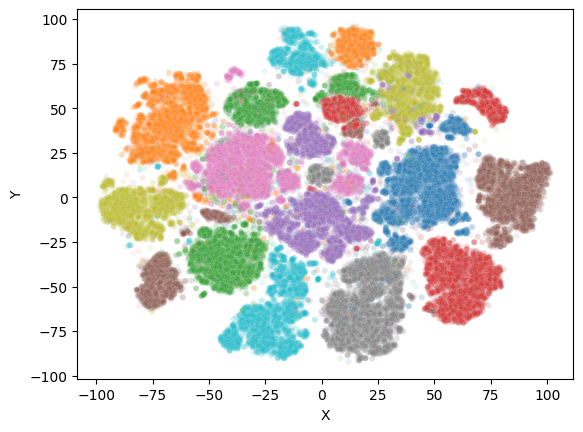

time: 2.05 s (started: 2023-06-03 19:24:17 -07:00)


In [92]:
seascatter_mnist(n_components=300, normalized=True, alpha=0.1)